# Qiskit Assignment 0
## Intro to Qiskit and Your First Quantum Circuit
Welcome to your first Qiskit assignment...etc

### Learning Objectives
1. Become familiar with using the Qiskit package
2. Understand the difference between classical and quantum bits
3. Build simple quantum circuits, implement gates, and perform measurement
4. Run your own quantum circuit on a real quantum device

### Helpful Resources
- https://qiskit.org/learn
- https://qiskit.org/textbook/ch-appendix/linear_algebra.html
- https://qiskit.org/textbook/ch-prerequisites/python-and-jupyter-notebooks.html
- etc...

In [1]:
#Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
import pprint

#### Task 1 - Building Circuits
Read about Quantum Circuits [here](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit)

Create a circuit with 1 quantum bit and 1 classical bit and perform a measurement.

In [2]:
#Sample
#qc = ?

#Answer
qc = QuantumCircuit(1,1)
qc.measure(0,0)

We can visualize circuits using the QuantumCircuit's [draw method](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit#qiskit.circuit.QuantumCircuit.draw)
#### Task 2 - Drawing Circuits
Draw your circuit from Task 1 using ascii art and matplotlib.

In [3]:
#Sample

#Answer
qc.draw()

┌─┐
q_0: ┤M├
     └╥┘
c: 1/═╩═
      0

In [5]:
#Sample

#Answer
qc.draw(output='mpl')

1


Note: We typically use matplotlib to draw our circuits because... it's nicer to look at generally.

#### Task 3 - Running Circuits and Getting Results
Circuits aren't very helpful unless we can run them and observe the outputs.
We will use the [qasm simulator](https://qiskit.org/documentation/stubs/qiskit.providers.aer.QasmSimulator.html) to simulate our circuit on an ideal quantum machine. (Remember real quantum devices are noisy!)

Use Qiskit's documentation to run your circuit 1024 times and plot the results.
*(What should we expect to observe as our circuit's output?)*

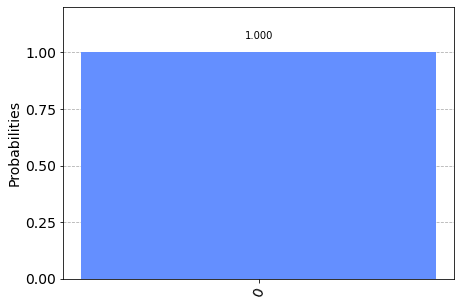

In [14]:
#Answer
qasm_sim = Aer.get_backend('qasm_simulator') #We first get the simulator
shots = 1024 #shots is the number of times we want to run our circuit
qobj = assemble(qc, shots=shots) #we then turn our circuit into something the simulator can run
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

You should see 0 with 100% probability. Recall qubits are initialized in the zero state.

#### Task 4 - Running Your Circuit on a Real Quantum Device
Now let's compare our results from the simulator with the results from a real quantum device.
*(What should we expect to see?)*<br>
If you have not done so already, create an account at [IBM Q](https://www.ibm.com/quantum-computing/) and paste your token into the code block below.

In [15]:
# IBMQ.save_account('replace with your token and uncomment the first time')
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-14 16:21:27,615: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

The code block below lists some info about the available IBM quantum devices and queues. (Note: We can also use the [least_busy](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.least_busy.html) method to help us find a suitable device)

In [16]:
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    status = backend.status().to_dict()
    if status['operational'] and status['status_msg']=='active':
        print( pprint.pformat(backend.status().to_dict()) )

{'backend_name': 'ibmq_qasm_simulator',
 'backend_version': '0.1.547',
 'operational': True,
 'pending_jobs': 0,
 'status_msg': 'active'}
{'backend_name': 'ibmqx2',
 'backend_version': '2.3.6',
 'operational': True,
 'pending_jobs': 2,
 'status_msg': 'active'}
{'backend_name': 'ibmq_16_melbourne',
 'backend_version': '2.3.24',
 'operational': True,
 'pending_jobs': 13,
 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk',
 'backend_version': '2.4.10',
 'operational': True,
 'pending_jobs': 1,
 'status_msg': 'active'}
{'backend_name': 'ibmq_athens',
 'backend_version': '1.3.19',
 'operational': True,
 'pending_jobs': 21,
 'status_msg': 'active'}
{'backend_name': 'ibmq_santiago',
 'backend_version': '1.3.22',
 'operational': True,
 'pending_jobs': 30,
 'status_msg': 'active'}
{'backend_name': 'ibmq_lima',
 'backend_version': '1.0.11',
 'operational': True,
 'pending_jobs': 24,
 'status_msg': 'active'}
{'backend_name': 'ibmq_belem',
 'backend_version': '1.0.12',
 'operational': True,
 

Choose one of these backends and insert its name into the code block below. Running this code block will execuete your circuit on an IBM quantum device. You should see the job appear on the IBM Q website. Note: It may take a while for your job to complete based on queue times.

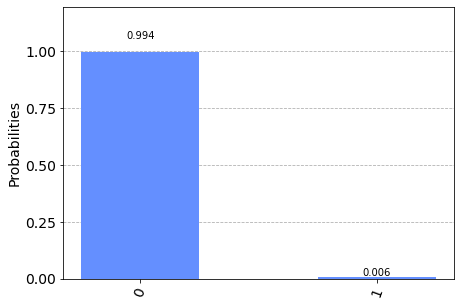

In [17]:
ibmqc = provider.get_backend('ibmq_manila')
job = execute(qc, ibmqc, shots=500)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

Do you see the same results as the qasm simulator? Why or why not?

#### Task 5 - 2 qubits
We now introduce Qiskit's [Pauli X gate](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) so that we can prepare qubits in state one.

Below create a new QuantumCircuit with 2 qubits and 2 classical bits. Prepare the first qubit in state zero and the second qubit in state one. Draw your complete circuit. Don't forget to measure! 

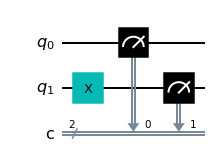

In [22]:
#Answer
qc2 = QuantumCircuit(2,2)
qc2.x(1)
qc2.measure(range(0,2),range(0,2))
qc2.draw(output='mpl')

Think about what output you expect to see from this circuit. Write down your expectation. Now run your circuit on the qasm simulator and compare the results.

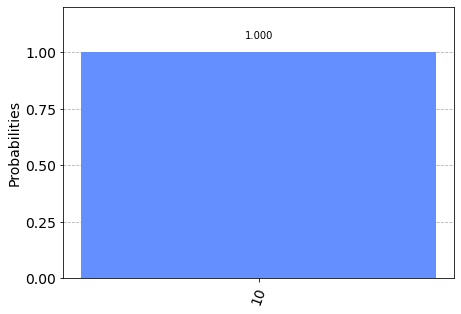

In [23]:
#Answer
shots = 1024 
qobj = assemble(qc2, shots=shots) 
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Were there any differences between your prediction and the qasm simulator's results? If so, don't feel bad! Qiskit uses a slightly different convention when listing its qubits. $q_0$ in your circuit is the bit on the far right in the result. ADD BETTER EXPLANATION HERE... There are some strategies to list the results in a more conventional ordering but for this class we want to ?? See this [video](https://www.youtube.com/watch?v=EiqHj3_Avps) by Qiskit for more info on qubit ordering.

#### Conclusion
This is the general workflow of building and running quantum circuits. We will introduce more qubits and gates as needed to solve problems.

### Extension Ideas
- Play around with CNOT and H gates
- Introduce statevector backend?
- Create a function that given a circuit runs that circuit with all possible basis inputs and returns the results (harder)